## Reading of ASCII files created for cam diagnostics tool

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from glob import glob
import os
import helper_funcs as helpers
import ipywidgets as ipw

### 1. Paths and global settings (GLOB)  

Please change accordingly if you execute this notebook on your local machine.

#### 1.1. Paths (PATHS)

Here you can specify your paths.

In [2]:
#folder with ascii files
data_dir = "./data/michael_ascii_read/"
file_type = "webarchive"

# file containing additional information about variables (long names, can be interactively updated below)
varinfo_csv = "./data/var_info.csv"

# Config file for different groups
vargroups_cfg = "./data/varconfig.ini"

#directy to store results
output_dir = "./output/"

#### Global settings (SETUP)

In the following cells you can specify global default settings.

##### Define group of variables that you are interested in

Default group of variables. Variable groups can be defined in [varconfig.ini](https://github.com/jgliss/my_notebooks/blob/master/data/varconfig.ini). Use ``[group_name]`` to define a new group and add below all variables that should belong to the group in the desired display order (should be self-explanatory when looking at the file, I hope).

In [3]:
var_group = "test" #group_name (AS STRING, e.g. "test") from varconfig.ini (use None, if you want to use all)

##### Add data columns to index

Use the following list to specify table columns that should be added to the multiindex (Ada, here is where you can add "Obs").

In [4]:
add_to_index = ["Obs"] #NEEDS TO BE A LIST, EVEN FOR ONLY ONE ITEM

##### Define which parts of index should be unstacked

The following list can be used to specify how the final lists are displayed. The items in the list need to be names of sub-indices in the the Multiindex of the originally loaded file (i.e. "Run", "Years", "Variable", "Description") or data columns that were added to index (previous option). 

All values specified here will be unstacked, i.e. put from the original row into a column index representation (makes table view wider).

In [5]:
unstack_indices = ["Run", "Years"]

### 2. Importing and editing supplementary information

Let's begin with reading the variable information from the excel table. Note that this is not strictly required but helps us below to display the results in a more intuitive manner, when analysing the data.

Note that the following method makes sure the CSV file exists, i.e. if it has not been created before, the information is loaded from Michaels Excel table and then saved at ``varinfo_csv``.

In [6]:
var_info_dict = helpers.load_varinfo(varinfo_csv)

The following cell opens an interactive widget that can be used to edit the information available for each variable (stored in file ``varinfo_csv``, see previous cell).

In [7]:
from my_widgets import EditDictCSV

edit_config = EditDictCSV(varinfo_csv)
#show
edit_config()

Now update to the current selection (run everything below if you change the previous cell).

In [8]:
var_info_dict = edit_config.var_dict

### 3. Search and load ASCII files, either using .asc or .webarchive file type (LOAD_FILE)

The following cell finds all files in folder ``data_dir``.

In [9]:
files = sorted(glob(data_dir + "*.{}".format(file_type)))
for file in files:
    print(file)    

./data/michael_ascii_read/N1850C53CLM45L32_f09_tn11_191017 (yrs 71-100).webarchive
./data/michael_ascii_read/N1850_f09_tn14_230218 (yrs 1-20).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r227_ctrl (yrs 185-215).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r227_ctrl (yrs 310-340).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r227_ctrl (yrs 80-110).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r265_ctrl_20180411 (yrs 90-120).webarchive


##### 3.1 Shortcuts for Run IDs

Define list of shortnames for model runs or define a prefix. If undefined (i.e. empty list and ``None``), the original names are used.

In [10]:
#either
run_ids = None #list("ABCD") #renames the first 4 runs
#or
run_id_prefix = "Run"

### 4. Importing multiple result files and concatenating them into one Dataframe (LOAD_FILES)

In the following, we load all files into one `Dataframe`. 

To do this, a custom method `read_and_merge_all` was defined in [helper_funcs.py](https://github.com/jgliss/my_py3_scripts/blob/master/notebooks/helper_funcs.py). The method basically loops over all files and calls the method ``read_file_custom``, which you can also find in [helper_funcs.py](https://github.com/jgliss/my_py3_scripts/blob/master/notebooks/helper_funcs.py). 

In [11]:
merged = helpers.read_and_merge_all(file_list=files, var_info_dict=var_info_dict, replace_runid_prefix=run_id_prefix)
if add_to_index:
    for item in add_to_index:
        merged = merged.set_index([merged.index, item])
#remember original order of index hierarchy
idx_order_init = merged.index.names
merged

/home/jonasg/github/my_notebooks/helper_funcs.py:117: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.test_case = pd.Series(mapping)


Flag     Model  \
Run  Years  Variable           Description         Obs                          
Run1 71-100 RESTOM             TOmodel net flux     0.000      True    -0.489   
            RESSURF            SRF net flux         0.000      True    -0.489   
            RESTOA_CERES-EBAF  TOA  net flux        0.992      True     1.529   
            RESTOA_ERBE                             0.059     False     1.529   
            SOLIN_CERES-EBAF                        340.054   False   340.206   
            SOLIN_CERES                             341.479   False   340.206   
            CLDTOT_ISCCP       Total cloud cover    66.800     True    63.621   
            CLDTOT_CLOUDSAT                         66.824    False    63.621   
            FLDS_ISCCP         LW down SRF          343.347    True   338.280   
            FLNS_ISCCP         LW net SRF           49.425     True    55.819   
            FLUT_CERES-EBAF    LW up Top            239.574    True   238.148   
            FLUT_CERES                              238.963   False   238.148   
            FLUT_ERBE                               233.946   False   238.148   
            FLUTC_CERES-EBAF   LW up Top Clearsky   266.051    True   261.783   
            FLUTC_CERES                             266.878   False   261.783   
            FLUTC_ERBE                              264.429   False   261.783   
            FLNT_CAM                               NaN        False   236.838   
            FSDS_ISCCP         SW down SRF          189.390    True   187.801   
            FSNS_ISCCP         SW net SRF           165.893    True   163.679   
            FSNS_LARYEA                             154.089   False   163.679   
            FSNTOA_CERES-EBAF                       240.566   False   239.677   
            FSNTOA_CERES       SW net TOA           244.691    True   239.677   
            FSNTOA_ERBE                             234.004   False   239.677   
            FSNTOAC_CERES-EBAF                      287.638   False   287.999   
            FSNTOAC_CERES      SW net TOA clearsky  294.702    True   287.999   
            FSNTOAC_ERBE                            289.329   False   287.999   
            FSNT_CAM                               NaN        False   236.348   
            LHFLX_JRA25        Lat Heat Flux        87.935     True    87.904   
            LHFLX_ERA40                             82.367    False    87.904   
            LHFLX_WHOI                              89.083    False    87.904   
...                                                             ...       ...   
Run4 90-120 PRECT_GPCP         Precipitation        2.674      True     2.918   
            PREH2O_NVAP                             24.597    False    25.733   
            PREH2O_AIRS                             20.425    False    25.733   
            PREH2O_JRA25                            20.425    False    25.733   
            PREH2O_ERAI                             24.247    False    25.733   
            PREH2O_ERA40       Precipitable water   24.948     True    25.733   
            PSL_JRA25          SeaLev pressure      1011.280   True  1011.614   
            PSL_ERAI                                1011.362  False  1011.614   
            SHFLX_JRA25        Sens Heat Flux       19.372     True    22.229   
            SHFLX_NCEP                              15.795    False    22.229   
            SHFLX_LARYEA                            13.236    False    22.229   
            STRESS_MAG_ERS                          0.064     False     0.063   
            STRESS_MAG_LARYEA                       0.071     False     0.063   
            STRESS_MAG_JRA25                        0.080     False     0.063   
            SWCF_CERES-EBAF    SW Cloud Forc       -47.071     True   -48.959   
            SWCF_CERES                             -48.586    False   -48.959   
            SWCF_ERBE                              -54.163    False   -48.959   
            A

### 5. Rearranging and restructuring of the imported data (REARRANGE)

In the following cell, you can interacively select which Variables you wish to keep for further analysis. Preselected are the variables that are flagged.

#### 5.1 Interactive selection of variables (IA_VAR)

In [12]:
from my_widgets import SelectVariable    
selector = SelectVariable(df=merged, level="Variable", preconfig_file=vargroups_cfg,
                         default_group=var_group)
#show
selector()

Now access the current selection and continue.

In [13]:
selection = selector.df_edit
selection

Flag    Model  \
Run  Years   Variable        Description       Obs                        
Run1 71-100  RESTOM          TOmodel net flux   0.000     True   -0.489   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   63.621   
             CLDTOT_CLOUDSAT                    66.824   False   63.621   
             FLDS_ISCCP      LW down SRF        343.347   True  338.280   
             PREH2O_ERAI                        24.247   False   23.974   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -48.323   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   16.571   
             Z3_500_NCEP                        56.581   False   56.347   
Run2 1-20    RESTOM          TOmodel net flux   0.000     True    0.987   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.586   
             CLDTOT_CLOUDSAT                    66.824   False   68.586   
             FLDS_ISCCP      LW down SRF        343.347   True  341.547   
             PREH2O_ERAI                        24.247   False   24.437   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.297   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   17.390   
             Z3_500_NCEP                        56.581   False   56.511   
Run3 185-215 RESTOM          TOmodel net flux   0.000     True    0.468   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.543   
             CLDTOT_CLOUDSAT                    66.824   False   68.543   
             FLDS_ISCCP      LW down SRF        343.347   True  353.861   
             PREH2O_ERAI                        24.247   False   28.091   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.805   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   18.774   
             Z3_500_NCEP                        56.581   False   56.879   
     310-340 RESTOM          TOmodel net flux   0.000     True    0.327   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.234   
             CLDTOT_CLOUDSAT                    66.824   False   68.234   
             FLDS_ISCCP      LW down SRF        343.347   True  354.846   
             PREH2O_ERAI                        24.247   False   28.385   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.605   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   18.783   
             Z3_500_NCEP                        56.581   False   56.917   
     80-110  RESTOM          TOmodel net flux   0.000     True    0.647   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.956   
             CLDTOT_CLOUDSAT                    66.824   False   68.956   
             FLDS_ISCCP      LW down SRF        343.347   True  348.508   
             PREH2O_ERAI                        24.247   False   26.871   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.988   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   18.905   
             Z3_500_NCEP                        56.581   False   56.714   
Run4 90-120  RESTOM          TOmodel net flux   0.000     True   -0.075   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   70.747   
             CLDTOT_CLOUDSAT                    66.824   False   70.747   
             FLDS_ISCCP      LW down SRF        343.347   True  347.854   
             PREH2O_ERAI                        24.247   False   25.733   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -48.959   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   17.869   
             Z3_500_NCEP                        56.581   False   56.586   

                                                           Bias    RMSE  
Run  Years   Variable        Description       Obs                       
Run1 71-100  RESTOM          TOmodel net flux   0.000    -0.489     NaN  
             CLDTOT_ISCCP    Total cloud cover  66.800   -3.179  11.323  
           

#### 5.2 Interactive index renaming tool (IA_RENAME)

In the following, an interactive widget is defined, that allows for renaming of the runs.

In [14]:
from my_widgets import IndexRenamer

renamer = IndexRenamer(selection, suggestions=run_ids)
renamer()

Now, update the current dataframe for further usage.

In [15]:
selection = renamer.df_edit

#### 5.3 Reshaping of table (make it wider for readibility) (RESHAPE)
 
For visualisation this display requires a lot of scrolling. We can make the table `wider` by unstacking certain indices, e.g. the two outermost indices `Run` and `Years`.

In [16]:
selection_unstacked = selection.unstack(unstack_indices)
selection_unstacked

Flag                         \
Run                                          Run1   Run2    Run3           
Years                                      71-100   1-20 185-215 310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824   False  False   False   False   
CLDTOT_ISCCP    Total cloud cover  66.800    True   True    True    True   
FLDS_ISCCP      LW down SRF        343.347   True   True    True    True   
PREH2O_ERAI                        24.247   False  False   False   False   
RESTOM          TOmodel net flux   0.000     True   True    True    True   
SWCF_CERES-EBAF SW Cloud Forc     -47.071    True   True    True    True   
U_200_JRA25     Zonal Wind JRA25   15.565    True   True    True    True   
Z3_500_NCEP                        56.581   False  False   False   False   

                                                            Model           \
Run                                                 Run4     Run1     Run2   
Years                                      80-110 90-120   71-100     1-20   
Variable        Description       Obs                                        
CLDTOT_CLOUDSAT                    66.824   False  False   63.621   68.586   
CLDTOT_ISCCP    Total cloud cover  66.800    True   True   63.621   68.586   
FLDS_ISCCP      LW down SRF        343.347   True   True  338.280  341.547   
PREH2O_ERAI                        24.247   False  False   23.974   24.437   
RESTOM          TOmodel net flux   0.000     True   True   -0.489    0.987   
SWCF_CERES-EBAF SW Cloud Forc     -47.071    True   True  -48.323  -45.297   
U_200_JRA25     Zonal Wind JRA25   15.565    True   True   16.571   17.390   
Z3_500_NCEP                        56.581   False  False   56.347   56.511   

                                                               ...      Bias  \
Run                                            Run3            ...      Run3   
Years                                       185-215  310-340   ...   185-215   
Variable        Description       Obs                          ...             
CLDTOT_CLOUDSAT                    66.824    68.543   68.234   ...     1.720   
CLDTOT_ISCCP    Total cloud cover  66.800    68.543   68.234   ...     1.744   
FLDS_ISCCP      LW down SRF        343.347  353.861  354.846   ...    10.514   
PREH2O_ERAI                        24.247    28.091   28.385   ...     3.844   
RESTOM          TOmodel net flux   0.000      0.468    0.327   ...     0.468   
SWCF_CERES-EBAF SW Cloud Forc     -47.071   -45.805  -45.605   ...     1.266   
U_200_JRA25     Zonal Wind JRA25   15.565    18.774   18.783   ...     3.209   
Z3_500_NCEP                        56.581    56.879   56.917   ...     0.298   

                                                                    RMSE  \
Run                                                         Run4    Run1   
Years                                      310-340 80-110 90-120  71-100   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824    1.411  2.133  3.923   9.731   
CLDTOT_ISCCP    Total cloud cover  66.800    1.435  2.157  3.947  11.323   
FLDS_ISCCP      LW down SRF        343.347  11.499  5.162  4.507  14.450   
PREH2O_ERAI                        24.247    4.138  2.624  1.486   1.887   
RESTOM          TOmodel net flux   0.000     0.327  0.647 -0.075     NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071    1.466  1.083 -1.888  10.324   
U_200_JRA25     Zonal Wind JRA25   15.565    3.218  3.340  2.304   2.444   
Z3_500_NCEP                        56.581    0.336  0.133  0.005   0.263   

                                                                            \
Run                                           Run2    Run3                   
Years                                         1-20 185-215 310-340  80-110   
Variable        Description       Obs                                        
CLDTOT_CL

In [17]:
from my_widgets import TableView
view = TableView(selection_unstacked, output_dir)
view()

Well, this is better but also not extremely illustrative / intuitive. It becomes more intuitive if we just look at one parameter that we are interested in (e.g. RMSE). 

#### 5.4 Extracting the Bias of each model run relative to the observations (GET_BIAS)

Retrieving a table that illustrates the Bias of each run for each flagged variable is straight forward. We just extract the `Bias` column from our flagged frame:

In [18]:
bias = selection_unstacked["Bias"]
bias

Run                                          Run1   Run2    Run3          \
Years                                      71-100   1-20 185-215 310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -3.203  1.762   1.720   1.411   
CLDTOT_ISCCP    Total cloud cover  66.800  -3.179  1.786   1.744   1.435   
FLDS_ISCCP      LW down SRF        343.347 -5.066 -1.799  10.514  11.499   
PREH2O_ERAI                        24.247  -0.273  0.191   3.844   4.138   
RESTOM          TOmodel net flux   0.000   -0.489  0.987   0.468   0.327   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -1.252  1.774   1.266   1.466   
U_200_JRA25     Zonal Wind JRA25   15.565   1.006  1.825   3.209   3.218   
Z3_500_NCEP                        56.581  -0.234 -0.070   0.298   0.336   

Run                                                 Run4  
Years                                      80-110 90-120  
Variable        Description       Obs                     
CLDTOT_CLOUDSAT                    66.824   2.133  3.923  
CLDTOT_ISCCP    Total cloud cover  66.800   2.157  3.947  
FLDS_ISCCP      LW down SRF        343.347  5.162  4.507  
PREH2O_ERAI                        24.247   2.624  1.486  
RESTOM          TOmodel net flux   0.000    0.647 -0.075  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   1.083 -1.888  
U_200_JRA25     Zonal Wind JRA25   15.565   3.340  2.304  
Z3_500_NCEP                        56.581   0.133  0.005

#### 5.5 Computing RMSE relative error (GET_RMSE_REL)

In the following we extract the subset containing the *RSME* information of the flagged variables for all runs in order to compute the relative error for each run based on the average *RMSE* of all runs:

$$\frac{RMSE_{Run}\,-\,\overline{RMSE_{All\,Runs}}}{\overline{RMSE_{All\,Runs}}}$$


In [19]:
rmse = selection_unstacked["RMSE"]
rmse

Run                                           Run1    Run2    Run3          \
Years                                       71-100    1-20 185-215 310-340   
Variable        Description       Obs                                        
CLDTOT_CLOUDSAT                    66.824    9.731  10.382  10.886  10.952   
CLDTOT_ISCCP    Total cloud cover  66.800   11.323  11.881  12.992  13.078   
FLDS_ISCCP      LW down SRF        343.347  14.450  15.351  16.891  17.664   
PREH2O_ERAI                        24.247    1.887   1.838   4.836   5.118   
RESTOM          TOmodel net flux   0.000       NaN     NaN     NaN     NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071   10.324   8.854  10.447  10.563   
U_200_JRA25     Zonal Wind JRA25   15.565    2.444   2.852   4.334   4.348   
Z3_500_NCEP                        56.581    0.263   0.172   0.391   0.424   

Run                                                   Run4  
Years                                       80-110  90-120  
Variable        Description       Obs                       
CLDTOT_CLOUDSAT                    66.824   10.894  10.561  
CLDTOT_ISCCP    Total cloud cover  66.800   12.869  12.485  
FLDS_ISCCP      LW down SRF        343.347  16.720  15.278  
PREH2O_ERAI                        24.247    3.909   2.674  
RESTOM          TOmodel net flux   0.000       NaN     NaN  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   10.393   9.973  
U_200_JRA25     Zonal Wind JRA25   15.565    4.335   3.342  
Z3_500_NCEP                        56.581    0.327   0.187

##### Side comment: Series vs. unstacked Multiindex Dataframes

As you can see in the previous output, we have extracted ***ONE*** variable from the ***UNSTACKED*** dataframe. Now, this is still a pandas ``Dataframe`` since it is *tabular* data. 

In [20]:
print("Extracted table is Dataframe since it is a wide table: {}".format(isinstance(rmse, pd.DataFrame)))

Extracted table is Dataframe since it is a wide table: True


In [21]:
rmse_mean = rmse.mean(axis=1, skipna=True)
#Note that the created object is a Series and not a Dataframe
rmse_mean.head()

Variable         Description        Obs    
CLDTOT_CLOUDSAT                     66.824     10.567667
CLDTOT_ISCCP     Total cloud cover  66.800     12.438000
FLDS_ISCCP       LW down SRF        343.347    16.059000
PREH2O_ERAI                         24.247      3.377000
RESTOM           TOmodel net flux   0.000            NaN
dtype: float64

The next step is (semi) straight forward (we have to use the `div` and `subtract` methods of the Dataframe rather than `/` and `-` operators in order to specify that we want to apply them in the horizontal and not in the vertical direction.

In [22]:
rmse_err_rel = rmse.subtract(rmse_mean, axis=0).div(rmse_mean, axis=0)
rmse_err_rel

Run                                             Run1      Run2      Run3  \
Years                                         71-100      1-20   185-215   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -0.079172 -0.017569  0.030123   
CLDTOT_ISCCP    Total cloud cover  66.800  -0.089645 -0.044782  0.044541   
FLDS_ISCCP      LW down SRF        343.347 -0.100193 -0.044087  0.051809   
PREH2O_ERAI                        24.247  -0.441220 -0.455730  0.432040   
RESTOM          TOmodel net flux   0.000         NaN       NaN       NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071   0.022955 -0.122700  0.035142   
U_200_JRA25     Zonal Wind JRA25   15.565  -0.322835 -0.209790  0.200831   
Z3_500_NCEP                        56.581  -0.105442 -0.414966  0.329932   

Run                                                                 Run4  
Years                                        310-340    80-110    90-120  
Variable        Description       Obs                                     
CLDTOT_CLOUDSAT                    66.824   0.036369  0.030880 -0.000631  
CLDTOT_ISCCP    Total cloud cover  66.800   0.051455  0.034652  0.003779  
FLDS_ISCCP      LW down SRF        343.347  0.099944  0.041161 -0.048633  
PREH2O_ERAI                        24.247   0.515546  0.157536 -0.208173  
RESTOM          TOmodel net flux   0.000         NaN       NaN       NaN  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   0.046636  0.029792 -0.011824  
U_200_JRA25     Zonal Wind JRA25   15.565   0.204710  0.201108 -0.074024  
Z3_500_NCEP                        56.581   0.442177  0.112245 -0.363946

### 5.6 Inserting column of RMSE relative error into original table (INSERT_RMSE_REL_ORIG)

If we want, we can now add the typical RMSE to our original dataframe (containing the only flagged data, since it was computed from this). 

**Note: this is just illustrative and not used in the following section**

First we have to stack it:

In [23]:
stacked = rmse_err_rel.stack(level=unstack_indices).reorder_levels(order=idx_order_init)
stacked.head()

Run   Years    Variable         Description  Obs   
Run1  71-100   CLDTOT_CLOUDSAT               66.824   -0.079172
Run2  1-20     CLDTOT_CLOUDSAT               66.824   -0.017569
Run3  185-215  CLDTOT_CLOUDSAT               66.824    0.030123
      310-340  CLDTOT_CLOUDSAT               66.824    0.036369
      80-110   CLDTOT_CLOUDSAT               66.824    0.030880
dtype: float64

In [24]:
selection["RMSE_ERR"] = stacked
selection

Flag    Model  \
Run  Years   Variable        Description       Obs                        
Run1 71-100  RESTOM          TOmodel net flux   0.000     True   -0.489   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   63.621   
             CLDTOT_CLOUDSAT                    66.824   False   63.621   
             FLDS_ISCCP      LW down SRF        343.347   True  338.280   
             PREH2O_ERAI                        24.247   False   23.974   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -48.323   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   16.571   
             Z3_500_NCEP                        56.581   False   56.347   
Run2 1-20    RESTOM          TOmodel net flux   0.000     True    0.987   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.586   
             CLDTOT_CLOUDSAT                    66.824   False   68.586   
             FLDS_ISCCP      LW down SRF        343.347   True  341.547   
             PREH2O_ERAI                        24.247   False   24.437   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.297   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   17.390   
             Z3_500_NCEP                        56.581   False   56.511   
Run3 185-215 RESTOM          TOmodel net flux   0.000     True    0.468   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.543   
             CLDTOT_CLOUDSAT                    66.824   False   68.543   
             FLDS_ISCCP      LW down SRF        343.347   True  353.861   
             PREH2O_ERAI                        24.247   False   28.091   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.805   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   18.774   
             Z3_500_NCEP                        56.581   False   56.879   
     310-340 RESTOM          TOmodel net flux   0.000     True    0.327   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.234   
             CLDTOT_CLOUDSAT                    66.824   False   68.234   
             FLDS_ISCCP      LW down SRF        343.347   True  354.846   
             PREH2O_ERAI                        24.247   False   28.385   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.605   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   18.783   
             Z3_500_NCEP                        56.581   False   56.917   
     80-110  RESTOM          TOmodel net flux   0.000     True    0.647   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   68.956   
             CLDTOT_CLOUDSAT                    66.824   False   68.956   
             FLDS_ISCCP      LW down SRF        343.347   True  348.508   
             PREH2O_ERAI                        24.247   False   26.871   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -45.988   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   18.905   
             Z3_500_NCEP                        56.581   False   56.714   
Run4 90-120  RESTOM          TOmodel net flux   0.000     True   -0.075   
             CLDTOT_ISCCP    Total cloud cover  66.800    True   70.747   
             CLDTOT_CLOUDSAT                    66.824   False   70.747   
             FLDS_ISCCP      LW down SRF        343.347   True  347.854   
             PREH2O_ERAI                        24.247   False   25.733   
             SWCF_CERES-EBAF SW Cloud Forc     -47.071    True  -48.959   
             U_200_JRA25     Zonal Wind JRA25   15.565    True   17.869   
             Z3_500_NCEP                        56.581   False   56.586   

                                                           Bias    RMSE  \
Run  Years   Variable        Description       Obs                        
Run1 71-100  RESTOM          TOmodel net flux   0.000    -0.489     NaN   
             CLDTOT_ISCCP    Total cloud cover  66.800   -3.179  11.323   
       

### 6. Conditional formatting of tables (Dataframes) (VISUALISE)

This section illustrates, how we can perform conditional formatting of the color tables. As discussed above, we can apply background colour gradients to the data. In the example above we had a multiindex data type specifying model run, year-range and variable in stacked format (long table) and the four data columns specifying results from model and observation as well as bias and RMSE. 

Now, in the following we illustrate how we can apply this colour highlighting for the two unstacked tables that we just created and that contain Bias and relative error. 

Starting with the Bias data, we show an example that does not work for our purposes (since it only allows for conditional formatting of either rows or columns.

In [25]:
bias

Run                                          Run1   Run2    Run3          \
Years                                      71-100   1-20 185-215 310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -3.203  1.762   1.720   1.411   
CLDTOT_ISCCP    Total cloud cover  66.800  -3.179  1.786   1.744   1.435   
FLDS_ISCCP      LW down SRF        343.347 -5.066 -1.799  10.514  11.499   
PREH2O_ERAI                        24.247  -0.273  0.191   3.844   4.138   
RESTOM          TOmodel net flux   0.000   -0.489  0.987   0.468   0.327   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -1.252  1.774   1.266   1.466   
U_200_JRA25     Zonal Wind JRA25   15.565   1.006  1.825   3.209   3.218   
Z3_500_NCEP                        56.581  -0.234 -0.070   0.298   0.336   

Run                                                 Run4  
Years                                      80-110 90-120  
Variable        Description       Obs                     
CLDTOT_CLOUDSAT                    66.824   2.133  3.923  
CLDTOT_ISCCP    Total cloud cover  66.800   2.157  3.947  
FLDS_ISCCP      LW down SRF        343.347  5.162  4.507  
PREH2O_ERAI                        24.247   2.624  1.486  
RESTOM          TOmodel net flux   0.000    0.647 -0.075  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   1.083 -1.888  
U_200_JRA25     Zonal Wind JRA25   15.565   3.340  2.304  
Z3_500_NCEP                        56.581   0.133  0.005

Now, this worked nicely but there are mainly two problems with this representation:

1. As mentioned above, one problem here is that the colour coding can only be performed row or column wise using the input parameter `axis` (and not based on the values of the whole table, see [here](https://pandas.pydata.org/pandas-docs/stable/style.html#Building-Styles-Summary) for details)
2. If we use the symmetric colormap as is (i.e. center colour is white), then, the color white will be mapped to the midpoint value of the considered value range (e.g. min=-2, max=4 => (4 - -2)/2 = 3 => 1 == white). However, what we want is a *shifter diverging colormap* that ensures that the value 0 is mapped white, even if min != -max.
3. Further, we might wish to have control over the number of significant digits that are displayed in the table

All these problems will be solved in the following.

#### 6.2 How we want it (VIS_RIGHT)

In the following, we use a custom display method `my_table_display` (that is defined in [helper_funcs.py](https://github.com/jgliss/my_py3_scripts/blob/master/notebooks/helper_funcs.py)) in order to perform colour formatting considering all rows and columns at the same time and furthermore, using a diverging colour map that is dynamically shifted such that value 0 corresponds to the colour white (method `shifted_color_map`) also if `-vmin != vmax` (like usually).

In [26]:
from helper_funcs import my_table_display
my_table_display(bias)

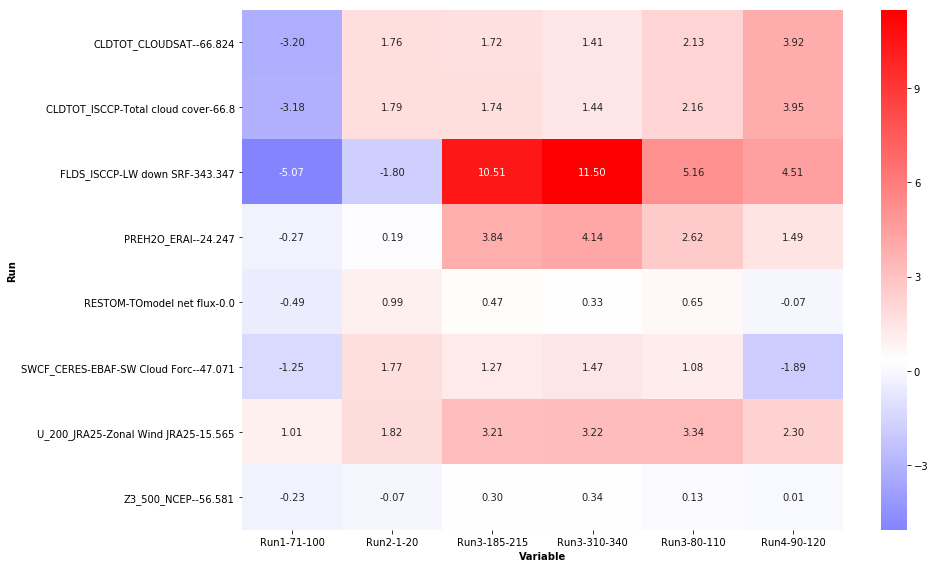

In [27]:
from helper_funcs import df_to_heatmap

ax = df_to_heatmap(bias, figsize=(14,8))
ax.set_xlabel("Variable", weight="bold")
ax.set_ylabel("Run", weight="bold")
ax.figure.tight_layout()
ax.figure.savefig(os.path.join(output_dir, "bias_table.png"))

Now for the typical RMSE error

In [28]:
my_table_display(rmse_err_rel)

/home/jonasg/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


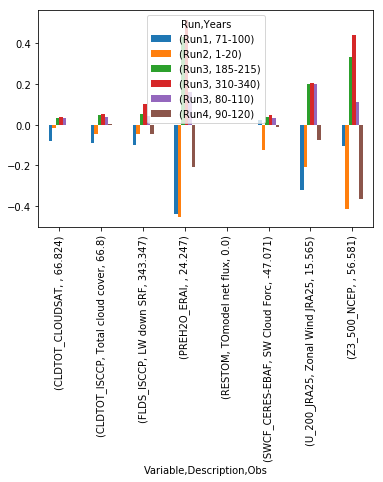

In [29]:
rmse_err_rel.plot(kind="bar")

### 7. Concatenate and save results (Bias and typical RMSE) as table (EXPORT)

In the following, the two result tables ``bias_table`` and ``typical_rmse`` are merged into one result table and then saved both as excel table and as csv file.

In [30]:
result = pd.concat([bias, rmse_err_rel],axis=1, keys=["Bias", "RMSE relative Error"])
result

Bias                         \
Run                                          Run1   Run2    Run3           
Years                                      71-100   1-20 185-215 310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -3.203  1.762   1.720   1.411   
CLDTOT_ISCCP    Total cloud cover  66.800  -3.179  1.786   1.744   1.435   
FLDS_ISCCP      LW down SRF        343.347 -5.066 -1.799  10.514  11.499   
PREH2O_ERAI                        24.247  -0.273  0.191   3.844   4.138   
RESTOM          TOmodel net flux   0.000   -0.489  0.987   0.468   0.327   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -1.252  1.774   1.266   1.466   
U_200_JRA25     Zonal Wind JRA25   15.565   1.006  1.825   3.209   3.218   
Z3_500_NCEP                        56.581  -0.234 -0.070   0.298   0.336   

                                                         RMSE relative Error  \
Run                                                 Run4                Run1   
Years                                      80-110 90-120              71-100   
Variable        Description       Obs                                          
CLDTOT_CLOUDSAT                    66.824   2.133  3.923           -0.079172   
CLDTOT_ISCCP    Total cloud cover  66.800   2.157  3.947           -0.089645   
FLDS_ISCCP      LW down SRF        343.347  5.162  4.507           -0.100193   
PREH2O_ERAI                        24.247   2.624  1.486           -0.441220   
RESTOM          TOmodel net flux   0.000    0.647 -0.075                 NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071   1.083 -1.888            0.022955   
U_200_JRA25     Zonal Wind JRA25   15.565   3.340  2.304           -0.322835   
Z3_500_NCEP                        56.581   0.133  0.005           -0.105442   

                                                                          \
Run                                             Run2      Run3             
Years                                           1-20   185-215   310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -0.017569  0.030123  0.036369   
CLDTOT_ISCCP    Total cloud cover  66.800  -0.044782  0.044541  0.051455   
FLDS_ISCCP      LW down SRF        343.347 -0.044087  0.051809  0.099944   
PREH2O_ERAI                        24.247  -0.455730  0.432040  0.515546   
RESTOM          TOmodel net flux   0.000         NaN       NaN       NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -0.122700  0.035142  0.046636   
U_200_JRA25     Zonal Wind JRA25   15.565  -0.209790  0.200831  0.204710   
Z3_500_NCEP                        56.581  -0.414966  0.329932  0.442177   

                                                                
Run                                                       Run4  
Years                                         80-110    90-120  
Variable        Description       Obs                           
CLDTOT_CLOUDSAT                    66.824   0.030880 -0.000631  
CLDTOT_ISCCP    Total cloud cover  66.800   0.034652  0.003779  
FLDS_ISCCP      LW down SRF        343.347  0.041161 -0.048633  
PREH2O_ERAI                        24.247   0.157536 -0.208173  
RESTOM          TOmodel net flux   0.000         NaN       NaN  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   0.029792 -0.011824  
U_200_JRA25     Zonal Wind JRA25   15.565   0.201108 -0.074024  
Z3_500_NCEP                        56.581   0.112245 -0.363946

Now save both tables as excel file.

In [31]:
writer = pd.ExcelWriter('{}/result.xlsx'.format(output_dir))
result.to_excel(writer)
writer.save()
writer.close()